<a href="https://colab.research.google.com/github/EnricoHuber/TensorFlow-Review/blob/main/Linear_Regression_with_TF_and_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression with TF

In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf

tf.version

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

In [4]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

In [5]:
print(dftrain.head(), dfeval.head(), sep='\n')

   survived     sex   age  ...     deck  embark_town  alone
0         0    male  22.0  ...  unknown  Southampton      n
1         1  female  38.0  ...        C    Cherbourg      n
2         1  female  26.0  ...  unknown  Southampton      y
3         1  female  35.0  ...        C  Southampton      n
4         0    male  28.0  ...  unknown   Queenstown      y

[5 rows x 10 columns]
   survived     sex   age  ...     deck  embark_town  alone
0         0    male  35.0  ...  unknown  Southampton      y
1         0    male  54.0  ...        E  Southampton      y
2         1  female  58.0  ...        C  Southampton      y
3         1  female  55.0  ...  unknown  Southampton      y
4         1    male  34.0  ...        D  Southampton      y

[5 rows x 10 columns]


In [6]:
y_train = dftrain.pop('survived')
y_test = dfeval.pop('survived')

### Exploring Data

In [7]:
for i in range(5):
  print(dftrain.loc[i], y_train.loc[i], sep='\n\n')

sex                          male
age                            22
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object

0
sex                      female
age                          38
n_siblings_spouses            1
parch                         0
fare                    71.2833
class                     First
deck                          C
embark_town           Cherbourg
alone                         n
Name: 1, dtype: object

1
sex                        female
age                            26
n_siblings_spouses              0
parch                           0
fare                        7.925
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 2, dtype: object

1
sex                   

In [8]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [9]:
def display_():    
    pd.set_option("display.max_rows", None)
    from IPython.core.display import display 
    display(dftrain)

display_()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.00,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.00,1,0,71.2833,First,C,Cherbourg,n
2,female,26.00,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.00,1,0,53.1000,First,C,Southampton,n
4,male,28.00,0,0,8.4583,Third,unknown,Queenstown,y
5,male,2.00,3,1,21.0750,Third,unknown,Southampton,n
6,female,27.00,0,2,11.1333,Third,unknown,Southampton,n
7,female,14.00,1,0,30.0708,Second,unknown,Cherbourg,n
8,female,4.00,1,1,16.7000,Third,G,Southampton,n
9,male,20.00,0,0,8.0500,Third,unknown,Southampton,y


In [10]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


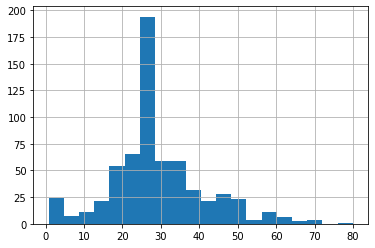

In [11]:
dftrain.age.hist(bins=20)   # Histogram of ages

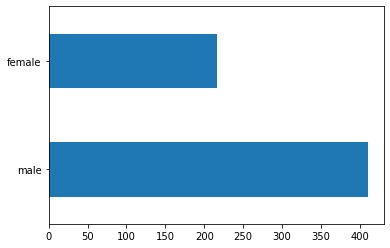

In [12]:
dftrain.sex.value_counts().plot(kind='barh')

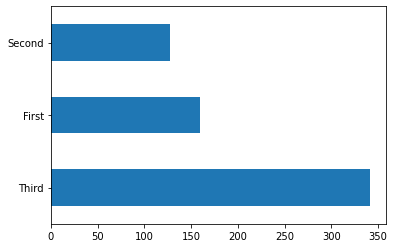

In [13]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

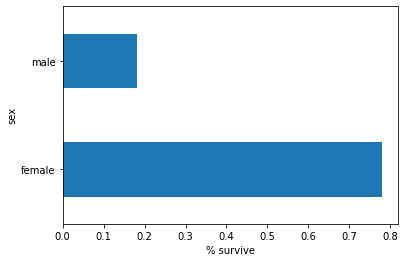

In [14]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

In [15]:
print(dftrain.shape, dfeval.shape, sep='\n\n')

(627, 9)

(264, 9)


## Feature building (categorical and numerical)

In [16]:
categ_col = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
numeric_col = ['age', 'fare']

feature_columns = []

for feature_name in categ_col:
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in numeric_col:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

## Training the model
Tensorflow needs data to be passed into **tf.data.Dataset** format

In [18]:
tf.data.Dataset.from_tensor_slices??

In [23]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_test, num_epochs=1, shuffle=False)

### Creating the Model

In [26]:
linear_estimator = tf.estimator.LinearClassifier(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpp82aqb0i', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [27]:
linear_estimator.train(train_input_fn)
clear_output()

In [28]:
result = linear_estimator.evaluate(eval_input_fn)
clear_output()
print(result['accuracy'])

0.7537879


In [30]:
result

{'accuracy': 0.7537879,
 'accuracy_baseline': 0.625,
 'auc': 0.82978266,
 'auc_precision_recall': 0.7645713,
 'average_loss': 0.48931533,
 'global_step': 200,
 'label/mean': 0.375,
 'loss': 0.4822596,
 'precision': 0.6545454,
 'prediction/mean': 0.4079013,
 'recall': 0.72727275}

Make the prediction

In [33]:
result = list(linear_estimator.predict(eval_input_fn))
print(result)

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpp82aqb0i/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[{'logits': array([-2.720118], dtype=float32), 'logistic': array([0.06179661], dtype=float32), 'probabilities': array([0.9382034 , 0.06179662], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([-0.1599652], dtype=float32), 'logistic': array([0.46009377], dtype=float32), 'probabilities': array([0.53990626, 0.4600938 ], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([1.0302695], dtype=float32), 'logistic': array([0.73696816], dtype=float32), 'probabilities': array([0.26303

In [34]:
result[0]

{'all_class_ids': array([0, 1], dtype=int32),
 'all_classes': array([b'0', b'1'], dtype=object),
 'class_ids': array([0]),
 'classes': array([b'0'], dtype=object),
 'logistic': array([0.06179661], dtype=float32),
 'logits': array([-2.720118], dtype=float32),
 'probabilities': array([0.9382034 , 0.06179662], dtype=float32)}

In [44]:
for i in range(len(dfeval)):
  print('\n')
  print(dfeval.loc[i])
  print(f'Probability of surviving: {result[i]["probabilities"][0]} ----- {y_test[i]}')



sex                          male
age                            35
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object
Probability of surviving: 0.9382033944129944 ----- 0


sex                          male
age                            54
n_siblings_spouses              0
parch                           0
fare                      51.8625
class                       First
deck                            E
embark_town           Southampton
alone                           y
Name: 1, dtype: object
Probability of surviving: 0.5399062633514404 ----- 0


sex                        female
age                            58
n_siblings_spouses              0
parch                           0
fare                        26.55
class                       First
deck                      